In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

# CSV 파일 불러오기

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [69]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

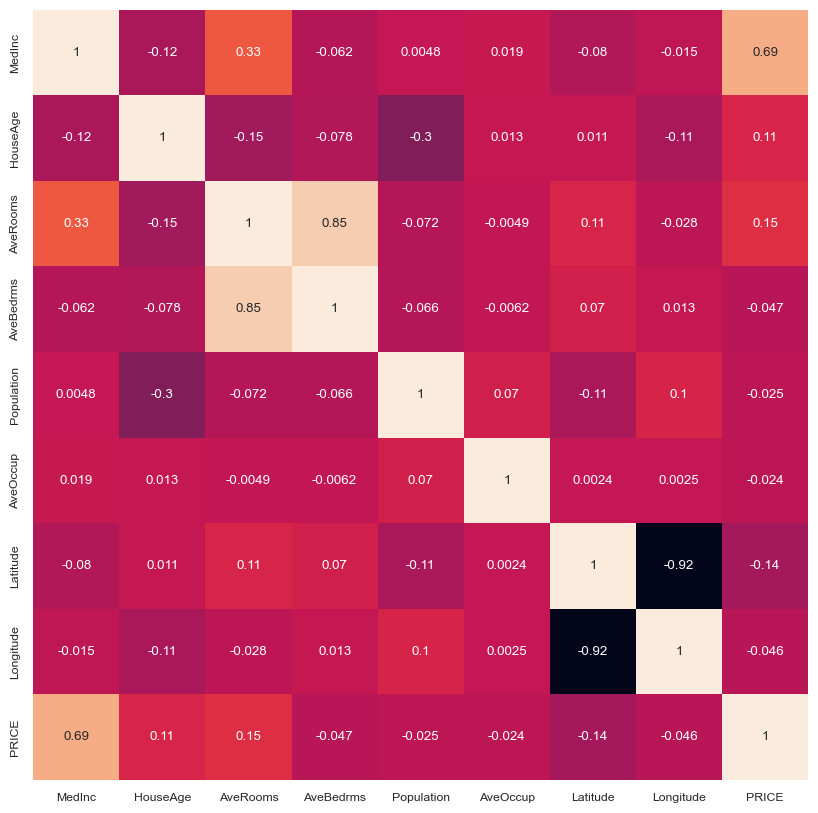

In [70]:
# 상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

# 히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 상관관계가 큰 순서 : MedInc, AveRooms, HouseAge, AveOccup, Population, Longitude, AveBedrms, Latitude

# MSE 구하기

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('PRICE', axis = 1)
Y = df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

# 결론 : Underfit이 나서 MSE가 커졌다

평균제곱근오차 0.7259426944496404


In [72]:
# 8개의 Feature 중 상관관계가 높은 7개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms, HouseAge, AveOccup, Population, Longitude, AveBedrms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = df.drop('Latitude', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Longitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556    -122.23   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842    -122.22   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260    -122.24   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945    -122.25   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467    -122.25   
...       ...       ...       ...        ...         ...       ...        ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606    -121.09   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807    -121.21   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635    -121.22   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209    -121.32   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981    -121.24   

       PRICE  
0      4.526

In [73]:
# 8개의 Feature 중 상관관계가 높은 6개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms, HouseAge, AveOccup, Population, Longitude

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('AveBedrms', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  HouseAge  AveRooms  Population  AveOccup  Longitude  PRICE
0      8.3252      41.0  6.984127       322.0  2.555556    -122.23  4.526
1      8.3014      21.0  6.238137      2401.0  2.109842    -122.22  3.585
2      7.2574      52.0  8.288136       496.0  2.802260    -122.24  3.521
3      5.6431      52.0  5.817352       558.0  2.547945    -122.25  3.413
4      3.8462      52.0  6.281853       565.0  2.181467    -122.25  3.422
...       ...       ...       ...         ...       ...        ...    ...
20635  1.5603      25.0  5.045455       845.0  2.560606    -121.09  0.781
20636  2.5568      18.0  6.114035       356.0  3.122807    -121.21  0.771
20637  1.7000      17.0  5.205543      1007.0  2.325635    -121.22  0.923
20638  1.8672      18.0  5.329513       741.0  2.123209    -121.32  0.847
20639  2.3886      16.0  5.254717      1387.0  2.616981    -121.24  0.894

[20640 rows x 7 columns]
평균제곱근오차 0.805442997070526


In [74]:
# 8개의 Feature 중 상관관계가 높은 5개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms, HouseAge, AveOccup, Population

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('Longitude', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  HouseAge  AveRooms  Population  AveOccup  PRICE
0      8.3252      41.0  6.984127       322.0  2.555556  4.526
1      8.3014      21.0  6.238137      2401.0  2.109842  3.585
2      7.2574      52.0  8.288136       496.0  2.802260  3.521
3      5.6431      52.0  5.817352       558.0  2.547945  3.413
4      3.8462      52.0  6.281853       565.0  2.181467  3.422
...       ...       ...       ...         ...       ...    ...
20635  1.5603      25.0  5.045455       845.0  2.560606  0.781
20636  2.5568      18.0  6.114035       356.0  3.122807  0.771
20637  1.7000      17.0  5.205543      1007.0  2.325635  0.923
20638  1.8672      18.0  5.329513       741.0  2.123209  0.847
20639  2.3886      16.0  5.254717      1387.0  2.616981  0.894

[20640 rows x 6 columns]
평균제곱근오차 0.8054427444115416


In [75]:
# 8개의 Feature 중 상관관계가 높은 4개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms, HouseAge, AveOccup

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('Population', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  HouseAge  AveRooms  AveOccup  PRICE
0      8.3252      41.0  6.984127  2.555556  4.526
1      8.3014      21.0  6.238137  2.109842  3.585
2      7.2574      52.0  8.288136  2.802260  3.521
3      5.6431      52.0  5.817352  2.547945  3.413
4      3.8462      52.0  6.281853  2.181467  3.422
...       ...       ...       ...       ...    ...
20635  1.5603      25.0  5.045455  2.560606  0.781
20636  2.5568      18.0  6.114035  3.122807  0.771
20637  1.7000      17.0  5.205543  2.325635  0.923
20638  1.8672      18.0  5.329513  2.123209  0.847
20639  2.3886      16.0  5.254717  2.616981  0.894

[20640 rows x 5 columns]
평균제곱근오차 0.8054693973689385


In [76]:
# 8개의 Feature 중 상관관계가 높은 3개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms, HouseAge

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('AveOccup', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  HouseAge  AveRooms  PRICE
0      8.3252      41.0  6.984127  4.526
1      8.3014      21.0  6.238137  3.585
2      7.2574      52.0  8.288136  3.521
3      5.6431      52.0  5.817352  3.413
4      3.8462      52.0  6.281853  3.422
...       ...       ...       ...    ...
20635  1.5603      25.0  5.045455  0.781
20636  2.5568      18.0  6.114035  0.771
20637  1.7000      17.0  5.205543  0.923
20638  1.8672      18.0  5.329513  0.847
20639  2.3886      16.0  5.254717  0.894

[20640 rows x 4 columns]
평균제곱근오차 0.8065510335613775


In [77]:
# 8개의 Feature 중 상관관계가 높은 2개의 Feature만을 사용해보기
# Feature : MedInc, AveRooms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('HouseAge', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  AveRooms  PRICE
0      8.3252  6.984127  4.526
1      8.3014  6.238137  3.585
2      7.2574  8.288136  3.521
3      5.6431  5.817352  3.413
4      3.8462  6.281853  3.422
...       ...       ...    ...
20635  1.5603  5.045455  0.781
20636  2.5568  6.114035  0.771
20637  1.7000  5.205543  0.923
20638  1.8672  5.329513  0.847
20639  2.3886  5.254717  0.894

[20640 rows x 3 columns]
평균제곱근오차 0.8316256187985555


In [78]:
# 8개의 Feature 중 상관관계가 높은 1개의 Feature만을 사용해보기
# Feature : MedInc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_df = new_df.drop('AveRooms', axis = 1)

print(new_df)

X = new_df.drop('PRICE', axis = 1)
Y = new_df['PRICE']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

       MedInc  PRICE
0      8.3252  4.526
1      8.3014  3.585
2      7.2574  3.521
3      5.6431  3.413
4      3.8462  3.422
...       ...    ...
20635  1.5603  0.781
20636  2.5568  0.771
20637  1.7000  0.923
20638  1.8672  0.847
20639  2.3886  0.894

[20640 rows x 2 columns]
평균제곱근오차 0.8383763662599217


In [ ]:
# 결론 : columns를 지울수록 mse가 커졌다. 오차가 많아졌다는 의미이다.

# 이유 : data의 양이 너무 적었기 때문에, underffiting이 발생했다.

# 가장 상관관계가 높은 Feature 3가지만 추려서 new_df 만들기

In [12]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.7259426944496404


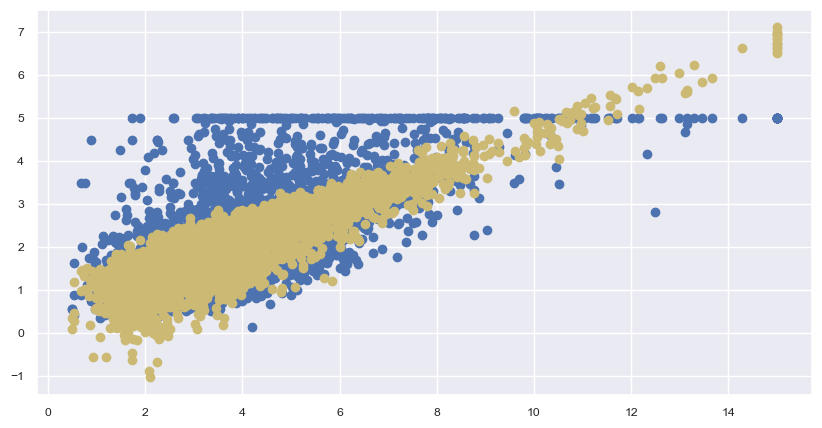

In [16]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.6969255939674025


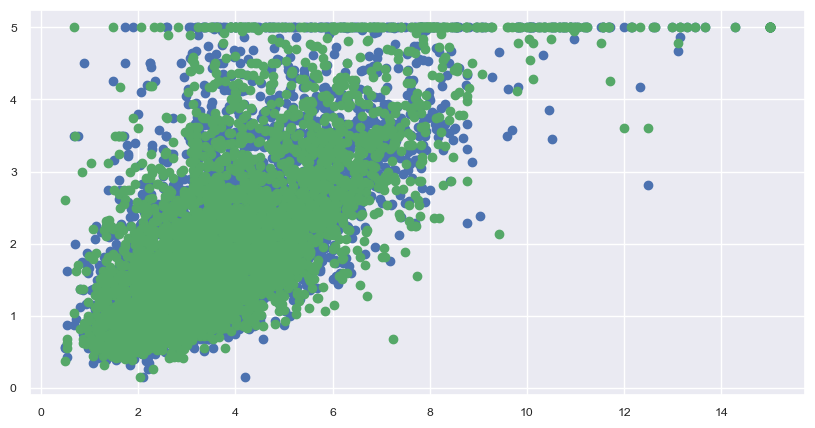

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5034271910766934


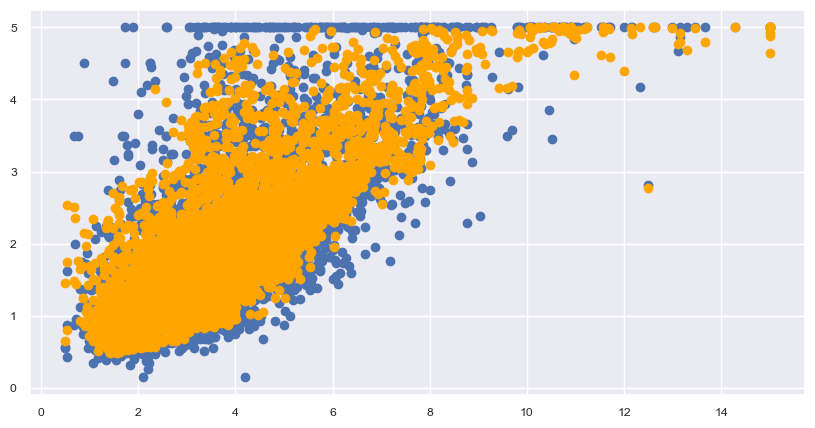

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [21]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test)) 
print('평균제곱근오차', mse)

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()    